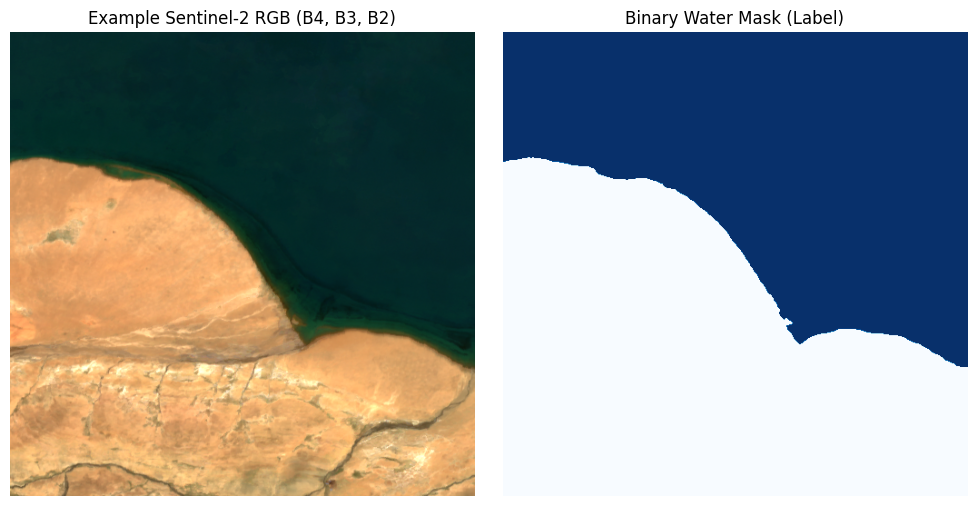

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# ---------- Read image ----------
img_path = "./example/img.tif"     #'B2', 'B3', 'B4', 'B8', 'B11', 'B12'
label_path = "./example/label.tif" 

# ---------- Read image ----------
with rasterio.open(img_path) as src:
    # Read bands: B2, B3, B4
    b2 = src.read(1).astype(np.float32)
    b3 = src.read(2).astype(np.float32)
    b4 = src.read(3).astype(np.float32)

# ---------- Create RGB composite ----------
rgb = np.stack([b4, b3, b2], axis=-1)
rgb = rgb / (np.percentile(rgb, 98) + 1e-6)
rgb = np.clip(rgb, 0, 1)

# ---------- Read label ----------
with rasterio.open(label_path) as src:
    label = src.read(1)

# ---------- Visualization ----------
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(rgb)
axes[0].set_title("Example Sentinel-2 RGB (B4, B3, B2)")
axes[0].axis("off")

axes[1].imshow(label, cmap='Blues')
axes[1].set_title("Binary Water Mask (Label)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# ---------- Optional: save figure ----------
# fig.savefig("example_visualization.png", dpi=300)
# print("Saved visualization to example_visualization.png")